In [55]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from joblib import dump, load

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [59]:
X= df.iloc[:,:-1]
X.shape

(303, 13)

In [60]:
y = df['target']
y.shape

(303,)

### NN Architechture

In [61]:
model = tf.keras.models.Sequential()
norm = tf.keras.layers.Normalization()
norm.adapt(X)
model.add(norm)
model.add(tf.keras.layers.Dense(units=6,activation='relu',input_shape=(13,)))
model.add(tf.keras.layers.Dense(units=6,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

es = tf.keras.callbacks.EarlyStopping(patience=10)

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'],
)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 13)               27        
 tion)                                                           
                                                                 
 dense_30 (Dense)            (None, 6)                 84        
                                                                 
 dense_31 (Dense)            (None, 6)                 42        
                                                                 
 dense_32 (Dense)            (None, 1)                 7         
                                                                 
Total params: 160
Trainable params: 133
Non-trainable params: 27
_________________________________________________________________


In [79]:
'''featSelector = SelectKBest(chi2, k=5)
X = df.iloc[:,:-1]  
y = df['target']
print(X.shape,y.shape)
featSelector.fit(X,y)
np.set_printoptions(precision=2)
features = featSelector.transform(X)
print(features.shape)'''

"featSelector = SelectKBest(chi2, k=5)\nX = df.iloc[:,:-1]  \ny = df['target']\nprint(X.shape,y.shape)\nfeatSelector.fit(X,y)\nnp.set_printoptions(precision=2)\nfeatures = featSelector.transform(X)\nprint(features.shape)"

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [83]:
history = model.fit(x=X, y=y, batch_size=8, epochs=100, callbacks=[es],validation_split=.2, verbose=True)

Epoch 1/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2446 - accuracy: 0.8926 - val_loss: 0.9071 - val_accuracy: 0.6066
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.8926 - val_loss: 0.8965 - val_accuracy: 0.6230
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.8926 - val_loss: 0.9152 - val_accuracy: 0.6230
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2427 - accuracy: 0.8884 - val_loss: 0.9048 - val_accuracy: 0.6230
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.8884 - val_loss: 0.9050 - val_accuracy: 0.6230
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2409 - accuracy: 0.8884 - val_loss: 0.9170 - val_accuracy: 0.6230
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.8884 - val_loss: 0.9128 - val_accuracy: 0.6230
Epoch 8/100
3

In [75]:
df = pd.DataFrame(history.history)
df['epoch'] = history.epoch

<AxesSubplot:>

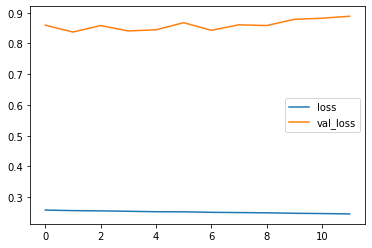

In [76]:
df[['loss','val_loss']].plot()

<AxesSubplot:>

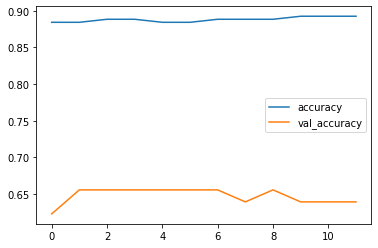

In [77]:
df[['accuracy','val_accuracy']].plot()

In [78]:
model.save('model_bekar_h')

INFO:tensorflow:Assets written to: model_bekar_h\assets
